<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/Data_Science_03_EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on the Titanic
This chapter will delve deeper into the exciting world of data science by focusing on the crucial step of exploratory data analysis (EDA). EDA is a fundamental part of any data science project, allowing us to understand the data we're working with and make informed decisions about how to proceed with our analysis.

Specifically, we'll be learning how to handle common challenges that arise when dealing with real-world data, such as missing data, outliers, and inconsistent data entries. Understanding and addressing these issues is vital for ensuring the reliability and validity of our analysis. We'll learn about various techniques for identifying and handling these issues, and apply them to a real dataset.

Speaking of datasets, the one we'll be using throughout this notebook is the Titanic dataset, a classic dataset in the data science world. This dataset contains passenger information from the infamous Titanic ship that sank in 1912 after hitting an iceberg. The data includes various details about each passenger, such as their age, sex, passenger class, fare, and most notably, whether or not they survived the sinking.

In addition to these practical skills, we'll also delve into data science's philosophical side. Specifically, we'll discuss the "problem of induction," a philosophical issue that deals with our ability to make generalizations or predictions based on specific observations. This issue is particularly relevant to data science, where we often need to make general predictions based on specific datasets.

By the end of this notebook, you will better understand the steps involved in preparing a dataset for analysis, and you will be more aware of the philosophical considerations underpinning our work as data scientists. So, let's dive in and get started!

## Loading the Data
The dataset we are going to use is based on the infamous Titanic ship, specifically, data about its passengers. This dataset is a classic in the data science world, often used for training and learning purposes. It contains information about the passengers who were onboard the Titanic, including details such as their age, sex, class, and importantly, whether they survived or not.

Let's begin by loading our data.

### Importing Necessary Libraries
Before we load our data, we must import the necessary libraries. Libraries are collections of functions and methods that allow us to perform many actions without writing a lot of code.

For this task, we are going to use the Pandas library, one of the most powerful and commonly used tools for data manipulation and analysis in Python.

In [17]:
# Importing the pandas library
import pandas as pd

### Loading the Data
With the necessary library imported, we can now load our dataset. Our data is stored in a **CSV (Comma Separated Values)** file, a type of file that stores tabular data. It is a simple and popular format among data scientists because of its easy readability and wide support.

Pandas provides a function, `read_csv()`, which reads a CSV file and converts it into a DataFrame. A DataFrame is a two-dimensional labeled data structure with columns of potentially different types. It is similar to a spreadsheet or SQL table, or a dictionary of Series objects.

Let's load our data now.

In [18]:
# Load the data
url = "https://github.com/brendanpshea/data-science/raw/main/data/titanic_train.csv"
titanic_df = pd.read_csv(url)

### Inspecting the Data
Great! We've now loaded our data. But how do we know if it was loaded correctly? And what does our data look like?

Pandas provides a method, `head()`, that allows us to inspect the first few rows of our DataFrame. By default, `head()` displays the first five rows.

In [19]:
# Display the first few rows of the DataFrame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The DataFrame you see is the first five rows of our Titanic dataset. Each row represents a passenger onboard the Titanic, and the columns contain various pieces of information about each passenger.

Here is a brief overview of what each column represents:

-   `PassengerId:` This is a unique number assigned to each passenger. It's simply a way to number each row in the dataset, and it doesn't have any real-world meaning about the passenger themselves.

-   `Survived:` This is our target variable, which we would like to predict if we were building a machine learning model. It indicates whether the passenger survived (1) or did not survive (0).

-   `Pclass:` This refers to the passenger's ticket class, a proxy for socio-economic status. It's an ordinal integer feature where 1 = 1st class (Upper), 2 = 2nd class (Middle), and 3 = 3rd class (Lower).

-   `Name:` The name of the passenger.

-   `Sex:` The gender of the passenger. It's a categorical feature with two values, male or female.

-   `Age:` The age of the passenger. There may be many missing values in this column, as indicated by the NaN (Not a Number) in the first row for the Cabin column.

-   `SibSp:` This is the number of siblings or spouses the passenger had aboard the Titanic.

-   `Parch:` This is the number of parents or children the passenger had aboard the Titanic.

-   `Ticket:` This is the ticket number of the passenger.

-   `Fare:` This is how much the passenger paid for their ticket.

-   `Cabin:` This is the cabin number of the passenger. Like the Age column, this column may also have many missing values.

-   `Embarked:` This is the port at which the passenger boarded the Titanic. It's a categorical feature with three possible values: C = Cherbourg, Q = Queenstown, S = Southampton.

In the rest of this chapter, we will delve into this dataset, clean it, and explore it

## Introduction to Exploratory Data Analysis (EDA)

As budding data scientists, you've just started a journey that will often lead you through a jungle of data. The path you forge to understand this wilderness is known as Exploratory Data Analysis (EDA).

EDA is a critical early step in the data science process, allowing you to dive into the heart of your dataset and emerge with valuable insights. It's a chance to roll up your sleeves and get hands-on with your data. So, let's understand a bit more about what EDA is and why it's important.

EDA is the practice of using visual and quantitative methods to understand and summarize a dataset without making any assumptions about its contents. It's all about exploring and it's the first step in your data analysis process. In EDA, we try to understand the patterns and relationships in our data, often by using visual methods.

The importance of EDA cannot be overstated. It enables us to:

-   Identify patterns and relationships in the data, which could lead to hypotheses for later testing.

-   Detect anomalies and outliers that might distort our later analysis.

-   Check the assumptions related to our chosen data analysis methods.

-   Select appropriate statistical tools and techniques for analysis.

-   Create a foundational understanding of the data, making it easier to communicate your results and findings to others.

To explore our data, we'll be asking a series of questions and seeking their answers by using a variety of statistical and visualization techniques. However, remember that EDA is not a rigid process. It's more of a creative and iterative process, allowing you to dig deeper as you uncover more about your data.

Also, while EDA helps us to understand the data's underlying structure and extract valuable insights, it's important to note that EDA doesn't directly involve making predictions or testing hypotheses. It simply helps us to comprehend the data better and guides us in building suitable predictive models or conducting statistical analysis.

In the next section, we'll dive right into EDA, using our Titanic dataset to guide us. We'll be addressing some key questions to help you understand basic concepts and techniques of data cleaning and EDA. By the end, you'll have a solid grasp of this critical phase of the data science process, and be well-equipped to tackle your own data exploration in the future. Let's get started!

### Exploring the Shape of the Dataset
The **shape** of the dataset refers to the number of rows (instances) and columns (features) it contains. In a DataFrame, the .shape attribute returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows and the second element is the number of columns.

Knowing the shape of your dataset can provide insight into the volume of data you have, which is an essential factor in determining your data analysis approach.

Here's how to find the shape of our DataFrame:


In [20]:
# Get the shape of the DataFrame
titanic_df.shape

(891, 12)

This statement will output the number of rows (891) and columns (21) in our DataFrame. This is a vital first step in understanding the structure and size of our dataset. It gives us an idea of how much data we're working with, which will inform our choices as we move through the data analysis process.

Remember, big datasets aren't necessarily better, and small datasets aren't necessarily worse. But the size of your dataset will impact what you can do with it, so it's good to know this right at the start of your EDA journey.

###  Understanding Data Types and Checking for Missing Values
As we continue our exploratory journey, the next key aspect of our dataset to understand is the types of data we're working with and where we might have missing information. For this purpose, the `.info()` method provided by pandas is extremely handy.

The `.info()` method offers a concise summary of our DataFrame. It provides essential information about the data types of our columns, the number of non-null entries (i.e., entries that are not missing), and memory usage. Understanding the data types is critical because certain operations and visualizations are only applicable to certain types of data.

Let's invoke this method on our titanic_df DataFrame:

In [21]:
# Print information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The `.info()` method gives us a summary of our DataFrame. Let's discuss the output and understand the key information it provides:

The output begins with confirming that `titanic_df` is a DataFrame object with 891 entries, ranging from index 0 to 890. We can see that the DataFrame contains 12 columns in total.

The data types of the columns are broken down into three categories: `int64`, `float64`, and `object`.

-   `int64`: This data type represents integer values. In our DataFrame, the columns 'PassengerId', 'Survived', 'Pclass', 'SibSp', and 'Parch' are of this type.

-   `float64`: This data type is used for floating-point numbers (numbers that have decimal points). The 'Age' and 'Fare' columns in our DataFrame are represented as `float64`.

-   `object`: This data type typically represents strings, but it can also be used to store different types of data. In our DataFrame, 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' columns are of this type.

Now, let's move to the Non-Null Count. This tells us the number of entries in each column that are not missing (non-null).

-   Most of our columns like 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', and 'Fare' have 891 non-null entries, meaning they don't have any missing values.

-   However, 'Age', 'Cabin', and 'Embarked' columns have less than 891 non-null entries. This means these columns have missing values. Specifically, 'Age' has 177 missing values, 'Cabin' has 687 missing values, and 'Embarked' has 2 missing values.

The `memory usage: 83.7+ KB` line tells us the amount of memory used by our DataFrame.

Understanding the data types and the location of missing values in our dataset will guide us in our next steps of data cleaning and exploratory data analysis.

### Handling Missing Values


The task of handling missing values is an essential step in the data cleaning process. Data can be missing for various reasons: maybe an individual chose not to share their age, a technical glitch didn't record the cabin number, or perhaps the port of embarkation data was lost. Whatever the reason, our task is to make a strategic choice about how to handle these gaps in our dataset.

There are three fundamental strategies for handling missing data:

1.  **Imputation:** This strategy involves filling missing data with some value. The choice of value can significantly affect our analysis, and it usually depends on the nature of our data. Common choices are:

    -   **Mean:** The mean or average is the sum of all values divided by the number of values. It works well when the data is normally distributed, but it can be misleading if there are outliers in the data.

    -   **Median:** The median is the middle value in a dataset. It separates the data into two halves and is less affected by outliers and skewed data.

    -   **Mode:** The mode is the most frequently occurring value in a dataset. It is often used for categorical data.

2.  **Deletion:** In this strategy, we remove the rows or columns with missing values. This is usually done when the number of missing values is relatively small, and removing them would not cause significant loss of information.

3.  **Prediction:** Advanced methods involve predicting missing values, using machine learning algorithms or other techniques. However, for our beginner's guide, we will stick to imputation and deletion.

Let's address the missing values in our data:

-   Age: The 'Age' column is numerical data. It may contain outliers (for instance, a few very old passengers). Thus, using the median might be a good choice here as it is less sensitive to extreme values compared to the mean. We can use the Pandas method `fillna()` to fill the missing values. Here `inplace=True` indicates that changes are to be made directly to our DataFrame.

In [22]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

- Cabin: The 'Cabin' column has a large number of missing values. Rather than filling in this extensive missing data, we could drop the column entirely using the `drop()` method. The argument `axis=1` indicates we want to drop a column (not a row), and `inplace=True` applies the change to our DataFrame.

In [23]:
titanic_df.drop('Cabin', axis=1, inplace=True)

- Embarked: For the 'Embarked' column, only two values are missing. As it is a small fraction of the dataset, we might decide to drop these rows. We use the dropna() method here, specifying the 'Embarked' column.

In [24]:
titanic_df.dropna(subset=['Embarked'], inplace=True)

Remember, these are choices that we made for this specific analysis, given the nature of our data and our objective. We could have made different decisions, such as filling missing ages with the mean age, or replacing missing embarkation points with the mode. The essential point is to understand your data and make informed decisions about handling missing values.

To conclude this section, let's see what our data set looks like now:

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Feature Selection: Choosing the Right Columns

When we work with a dataset, especially one with many columns like the Titanic dataset, we often don't need to use every single column for our analysis. Feature selection, or choosing which features (columns) to include in our analysis, is a critical step in the data cleaning and preparation process.

The features that we include will depend on what sort of question(s) we are interested in answering. For example, suppose we are interested in the research question, **"How did age, gender, and passenger class affect survival on the Titanic?".**  This questions is interesting for several reasoning, including:

1.  The sinking of the Titanic is a significant event in history, and understanding the factors that influenced survival can shed light on societal norms of that era, like "women and children first."

2. The factors influencing survival in a disaster like the sinking of the Titanic could offer insights applicable to emergency planning and response today.

3. This question also provides a fantastic opportunity to learn and practice data cleaning, EDA, and data analysis techniques.

To answer this question, the 'Age', 'Sex', 'Pclass', and 'Survived' columns are particularly relevant:

- **Age:** Age could have been a factor in survival – perhaps younger or older individuals were less likely to survive.

- **Sex:** It's often said that in maritime disasters, the protocol was "women and children first" for lifeboats. The 'Sex' column can help us investigate whether this was indeed the case on the Titanic.

- **Pclass:** The 'Pclass' (passenger class) column can indicate socioeconomic status. First-class passengers had cabins closer to the deck and might have had better access to lifeboats, possibly influencing survival chances.

- **Survived:** Obviously, to understand what factors influenced survival, we need to know who survived and who didn't.



To keep only the columns we're interested in, we can use the following syntax:

In [26]:
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age']]
titanic_df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


This line is redefining `titanic_df`. The double square brackets ([[ ]]) are used for selecting a subset of the DataFrame. Inside the brackets, we've listed the column names we're interested in, each name enclosed in single quotes and separated by commas. Running this line of code simplifies our DataFrame to include only our selected columns.

### Why Not Keep Everything?
But you may ask, "Why not just keep all the columns? What's the harm?" Here's why feature selection is important:

-   **Simplicity:** Reducing the number of features makes your dataset easier to understand. It also simplifies any models or visualizations you create, making your results more interpretable.

-   **Efficiency:** Fewer features means less data, which can speed up computations and analysis.

-  **Quality:** Some features may not be useful or may even introduce noise or bias to your analysis. By focusing on the most relevant features, you can improve the quality of your analysis.

The choice of features to include in your analysis should be guided by your understanding of the data and the specific research question you are trying to answer. If a feature does not contribute to that question, it may be a candidate for removal.

## Activity: Research Questions and Choice of Factors

Suppose that, instead of examining the relationship between gender, age, class and survival, we were interested in a *different* question. For each of the following research questions, identify which features (columns) might be relevant.

1. Question: How did the fare price affect the survival rate on the Titanic?

2. Question: Did people with families onboard have a higher survival rate?

3. Question: Were passengers from certain embarkation ports more likely to survive?

4. Question: Did the cabin location (as determined by cabin number) influence survival rate?

5. Question: Did the title of passengers (which can be extracted from their names) influence survival chances?


## My Answers
For each research question above, identify the factors/columns that might be relevant:

1.

2.

3.

4.

5.

## Categorical Variables: Understanding and Transforming Data

Before we start exploring our data in more depth, let's take a moment to understand what kinds of variables we have in our dataset. Broadly speaking, variables in a dataset can be classified as either numerical or categorical.

**Numerical variables** are quantities that can be measured. In our Titanic dataset, 'Age' is an example of a numerical variable since it can take any value within a given range.

**Categorical variables**, on the other hand, are qualitative and describe a characteristic or category. For example, 'Sex' is a categorical variable since it can be 'male' or 'female'.

Sometimes, however, a variable may be coded as a number but represent categories. For example, in our Titanic dataset, the 'Survived' column consists of 1s and 0s. But these aren't continuous numerical values - they're representations of two categories: 'Survived' and 'Died'. Similarly, the 'Pclass' column represents three distinct passenger classes: 1st, 2nd, and 3rd.

Treating these as **categorical variables** rather than numerical variables is important for a couple of reasons:

1.  Interpretability: 'Survived' and 'Died' are much more meaningful to human readers than 1 and 0. Using categorical labels improves the readability and understanding of our data.

2.  Analysis: Certain statistical analyses are designed for categorical variables. By identifying the correct data type, we ensure the use of appropriate analytical techniques.

So, how do we convert these numerical variables to categorical ones in pandas? We use the `replace()` function. Here's how to do it:

In [28]:
titanic_df['Survived'] = titanic_df['Survived'].replace({0: 'Died', 1: 'Survived'})
titanic_df['Pclass'] = titanic_df['Pclass'].replace({1: '1st', 2: '2nd', 3: '3rd'})
titanic_df.head()

,Survived,Pclass,Sex,Age
0,Died,3rd,male,22.0
1,Survived,1st,female,38.0
2,Survived,3rd,female,26.0
3,Survived,1st,female,35.0
4,Died,3rd,male,35.0


In these lines of code, we're replacing the values in the 'Survived' and 'Pclass' columns. For the 'Survived' column, we're replacing 0 with 'Died' and 1 with 'Survived'. For 'Pclass', we're replacing 1, 2, and 3 with '1st', '2nd', and '3rd', respectively.

The replace function takes a dictionary as input, where the keys are the original values and the values are the new values. In our case, the dictionary for 'Survived' is `{0: 'Died', 1: 'Survived'}`. Here, 0 and 1 are the original values and 'Died' and 'Survived' are the new values that will replace them.


## Getting Basic Statistics: The Power of Describe


Once we have a clean dataset with the columns of interest, it's time to start digging into the data a bit more. One of the first steps in exploratory data analysis (EDA) is to examine basic statistics. The method `describe(include="all")` (for numeric columns only) or `describe(include="all")` (for both numeric and categorical columns) in pandas is a convenient way to do this.

For numerical data (the, it provides:

-   count: number of non-null entries
-   mean: average of the entries
-   std: standard deviation, a measure of how spread out the entries are from the mean
-   min: smallest entry
-   25%, 50%, 75%: the 25th, 50th, and 75th percentiles, also known as the first quartile, median, and third quartile, respectively
-   max: largest entry

For categorical data, it provides:

-   count: number of non-null entries
-   unique: number of distinct categories
-   top: most common category
-   freq: frequency of the most common category

In [29]:
titanic_df.describe(include="all")

,Survived,Pclass,Sex,Age
count,889,889,889,889.000000
unique,2,3,2,NaN
top,Died,3rd,male,NaN
freq,549,491,577,NaN
mean,NaN,NaN,NaN,29.315152
std,NaN,NaN,NaN,12.984932
min,NaN,NaN,NaN,0.420000
25%,NaN,NaN,NaN,22.000000
50%,NaN,NaN,NaN,28.000000
75%,NaN,NaN,NaN,35.000000


Congratulations on running your first `describe()` method on your cleaned Titanic dataset! The output you are seeing in your Colab notebook can tell you quite a bit about the data you are working with. Let's walk through what each of these statistics tells us about our dataset.

Looking at the output, you'll notice that it is structured like a table with the column names of our dataset as the headers and different statistics as the rows. We're now going to decipher what each row is telling us:

1.  count: This row tells us the total number of non-null entries in each column. For 'Survived', 'Pclass', 'Sex', and 'Age', we have 889 non-null entries. This suggests that our data cleaning process has been successful since all of these columns now have the same count.

2.  unique: This row indicates the number of distinct categories in each categorical variable. We can see that 'Survived' and 'Sex' each have 2 unique categories, while 'Pclass' has 3. There's no value for 'Age' as it is a numerical variable, not a categorical one.

3.  top: This row reveals the most common category in each categorical variable. The 'Survived' column shows 'Died' as the top category, meaning more passengers died than survived in our dataset. The 'Pclass' column tells us that '3rd' class is the most common, indicating most passengers travelled in third class. The 'Sex' column shows 'male' as the top category, meaning there were (somewhat) more male passengers than female.

4.  freq: This row shows the frequency of the most common category in each categorical variable. For instance, 'Died' occurred 549 times, '3rd' class occurred 491 times, and 'male' occurred 577 times.

For our single numerical variable, 'Age', we have a few more statistics:

1.  mean: This is the average age of passengers, which is approximately 29.3 years.
2.  std: This is the standard deviation, which measures how spread out the ages are. A standard deviation of approximately 13 years tells us that the ages vary quite a bit.
3.  min: This is the youngest passenger on board, who was just 0.42 years old (around 5 months).
4.  25% (1st Quartile): 25% of passengers were 22 years old or younger.
5.  50% (2nd Quartile or Median): Half of the passengers were 28 years old or younger.
6.  75% (3rd Quartile): 75% of passengers were 35 years old or younger.
7.  max: This is the oldest passenger on board, who was 80 years old.

From these statistics, we can already gather some interesting insights. For example, it appears that the Titanic was primarily filled with young, male passengers in third class. Moreover, more passengers died than survived. As we move further into exploratory data analysis, we will be able to dig deeper into these observations and uncover more interesting trends and patterns in our data.

## Visualizing Single Variables with Histograms and Bar Charts
Now that we've looked at some descriptive statistics, let's further our understanding of the data by creating visualizations. A good place to start is by visualizing single variables. Two very common and useful types of plots for this purpose are bar charts and histograms.

Let's discuss these types of plots and see how we can create them using the Pandas library.

### Histograms
Histograms are useful for visualizing the distribution of a single numerical variable. They divide the range of the variable into bins, and the height of each bar represents the number of data points that fall into each bin.

For example, let's take a look at the age distribution of passengers on the Titanic. We can create a histogram using the `hist()` function in pandas. This function will automatically divide the age data into bins and count the number of passengers in each bin.

<Axes: >

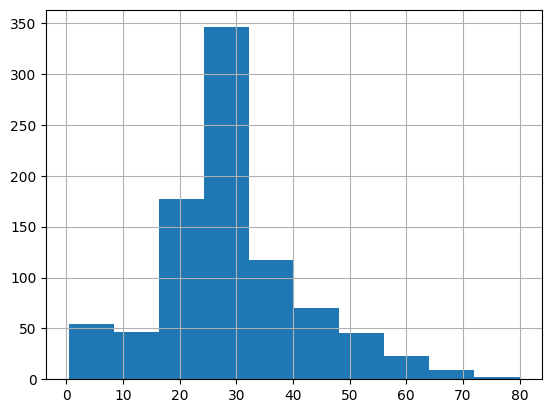

In [30]:
titanic_df['Age'].hist()

We see here that around 350 passengers were between 25 and 32 years of age, while there were less than 10 passengers over 75.

### Bar Charts
Bar charts, on the other hand, are great for visualizing categorical variables. Each category is represented by a bar, and the height or length of the bar corresponds to the number of data points in that category.

For instance, to create a bar chart showing the number of survivors and non-survivors, we can use the `value_counts()` function to count the number of occurrences of each category, and then use the `plot()` function with kind='bar' to create a bar chart.

<Axes: >

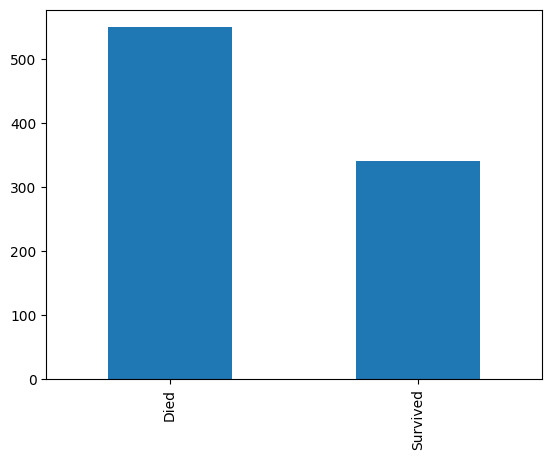

In [31]:
titanic_df['Survived'].value_counts().plot(kind='bar')

Similarly, to visualize the passenger count across different passenger classes, we can create another bar chart:

<Axes: >

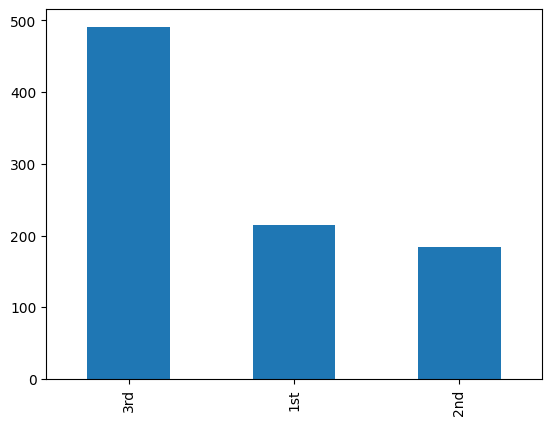

In [32]:
titanic_df['Pclass'].value_counts().plot(kind='bar')


Remember, the choice of the type of visualization depends on the type of variable we are examining. Histograms are best suited for numerical variables to understand the distribution, while bar charts are useful for categorical variables to understand the frequency of each category.

## Exploring Relationships Between Variables
After examining the individual variables, the next step in our EDA is to explore the relationships between different pairs of variables. This can help us understand how the variables interact with each other, and if there are any interesting patterns or associations to note.

There are a few different ways to visualize the relationships between variables. We will look at two main methods: cross-tabulations and grouped bar charts.

### Cross-tabulations
Cross-tabulations (or **contingency tables**) show the distribution of two categorical variables. They can help us to understand the relationship between these variables.

In Python, we can use the `pd.crosstab()` function to create a cross-tabulation. For instance, if we want to see how survival rate varies with passenger class and sex, we could create a cross-tabulation like so:

In [36]:
cross_tab = pd.crosstab(index=[titanic_df['Survived'], # First factor to compare
                               titanic_df['Sex']], # second factor to compare
                        columns=titanic_df['Pclass']) # the factor we want as our "column"
cross_tab


Pclass           1st  2nd  3rd
Survived Sex                  
Died     female    3    6   72
         male     77   91  300
Survived female   89   70   72
         male     45   17   47

This cross-tabulation table allows us to see the distribution of certain categories (in this case, 'Survived' status and 'Sex') across another category ('Pclass'). Here's how to read it:

-   The rows represent the categories 'Survived' (Died or Survived) and 'Sex' (female or male). Each combination of these two categories forms one row in the table.
-   The columns represent the 'Pclass' category, which stands for passenger class (1st, 2nd, or 3rd).
-   Each cell in the table shows the count of passengers that fit all the criteria for that cell. For example, the cell in the top left corner tells us that there were 3 females in the 1st class who didn't survive.

From this table, we can glean some interesting insights:

1.  First Class had the highest survival rate for both men and women. There were 89 female survivors and 45 male survivors, compared to only 3 female and 77 male passengers who didn't survive.

2.  The number of survivors decreases as we move from first class to third class, and the number of non-survivors increases. This might suggest that passenger class played a significant role in survival chances.

3.  Most of the non-survivors were men in the 3rd class (300 men didn't survive).

4.  Despite the overall high fatality rate in the 3rd class, the number of female survivors in the 3rd class (72) was the same as the number of non-survivors (72). This could suggest that 'women and children first' policy might have been implemented during the evacuation.

Remember, these are just observations based on the data in the table. They may suggest trends, but more in-depth analysis would be required to confirm any hypotheses. And as always in data analysis, correlation doesn't imply causation!

## Grouped Bar Charts
Another option for visualizing the relationships between categorical variables is to create grouped bar charts. Here's how you can create one showing survival rates within each passenger class:

<Axes: title={'center': 'Survival by Passenger Class'}, xlabel='Pclass'>

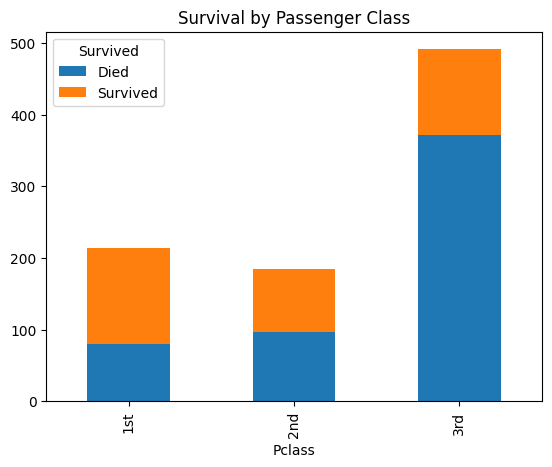

In [37]:
survival_by_class = pd.crosstab(index=titanic_df['Pclass'], columns=titanic_df['Survived'])
survival_by_class.plot(kind='bar', stacked=True, title='Survival by Passenger Class')


The resulting chart shows the number of survivors and non-survivors within each passenger class.

These visualizations can give you a more comprehensive understanding of your data and might reveal patterns or trends that you wouldn't spot by looking at individual variables alone.

## Case Study: Deductive and Inductive Inferences in Data Science

When we work with data, we often make inferences or draw conclusions based on our observations. These inferences typically fall into two categories: deductive and inductive. Understanding the difference between these two forms of reasoning is a fundamental aspect of data science.

#### Deductive Inference

Deductive inference refers to the process of reaching a conclusion that is logically guaranteed by the initial premises. In other words, if our premises (our initial observations or data) are true and we follow correct logical processes, then our conclusion will also be guaranteed to be true.

Deductive inferences are not risky because, given that the premises are true, the conclusion must be true. For example, within the realm of exploratory data analysis, there are many instances where we make deductive inferences. Here are few:

-   When we calculate the mean or median of a column, we're making a deductive inference. If our data is correct, then our calculated mean or median is guaranteed to be correct.
-   If we're observing that the column 'Survived' is coded as '0' for non-survivors and '1' for survivors, and we find an average (mean) survival rate of '0.4', we can deductively infer that 40% of the passengers in our dataset survived. Again, if our data is correct, this conclusion is guaranteed to be correct.

In these examples, deductive inferences are helping us process and summarize our data. They don't extend beyond the data we have - they're simply calculations or operations we perform on our existing data.

#### Inductive Inference

On the other hand, inductive inference refers to the process of making generalized conclusions based on specific observations. Inductive inferences are "risky" because, while they are likely given the data we have, they aren't guaranteed to be true.

Here are a few examples of inductive inferences:

-   If we observe from our Titanic dataset that a majority of survivors were women and children, we might inductively infer that in maritime disasters, women and children are more likely to survive than men. This is a generalization that goes beyond our specific dataset.
-   If we find that first-class passengers had a higher survival rate, we might inductively infer that passenger class affects survival rates in shipwrecks.

These inferences extend beyond our data to make claims about the world. They're not guaranteed to be true, even if our data is correct - they're probabilities, and other data might lead us to revise these inferences.

## The Inductive Power of Data Science
Having thoroughly explored our data, we now venture (in future chapters) into the essence of data science: using our gathered and processed data to make inductive inferences. This step is where the true value of data analysis lies, as it propels our understanding beyond the confines of the data points in our dataset.

So, why might we be intrigued by the data and research questions that we've explored, like the survival rates on the Titanic? Here are some compelling reasons, each centered around the idea of inductive inference, which involves making educated guesses that extend beyond the immediate data:

1. Generalizing about a population: Our dataset is a sample drawn from a larger population. Inferences about this population based on our sample is an inductive step. For instance, we might infer from our data that women and passengers in first-class had higher survival rates on the Titanic.

2. Predicting future outcomes: Data patterns can guide predictions. For example, should a similar disaster happen in the future, our findings suggest that individuals from higher social classes would likely have a higher survival rate.

3. Understanding causal relationships: Our data can shed light on potential cause-effect relationships. The key question: did belonging to a higher passenger class result in increased survival rate on the Titanic, or was another variable influential?

4. Testing hypotheses: If we have a world hypothesis, data can test its validity. For instance, we might hypothesize the impact of age or gender on survival rates and compare these assumptions with the data.

5. Evaluating the effectiveness of policies or interventions: Following the introduction of a policy or intervention, data can evaluate its success. In the Titanic's context, we might assess the "women and children first" policy's impact.

6. Improving decision-making: Understanding our data's patterns can lead to informed decisions. Future shipbuilders could use this data to devise more effective evacuation procedures, for instance.

Bear in mind, the ultimate goal goes beyond identifying patterns in the data; it lies in leveraging these patterns to make educated guesses that extend beyond the immediate dataset. This exercise encapsulates the power and significance of inductive reasoning in data science, allowing us to transform data into meaningful, actionable insights.

### The Problem of Induction: Probabilistic Conclusions and the Eternally Open Inquiry

Having discussed the power and significance of inductive reasoning in data science, it's crucial to address a fundamental challenge that comes with it, often referred to as the "problem of induction". This issue arises from the fact that inductive reasoning, unlike its deductive counterpart, is never definitive. It is always open to re-evaluation and revision in light of new evidence.

Unlike deductive reasoning, which derives conclusions in a step-by-step, logically certain manner (where the truth of the conclusion is guaranteed by the truth of the premises), inductive reasoning is a leap from the known to the unknown. We move from specific observations (our data) to general conclusions. For instance, we might take our data about survival rates on the Titanic and use it to make generalizations about the role of social class, gender, and age in survival rates for similar disasters. But such conclusions are not iron-clad; they are probable, contingent on the quality and scope of our data and our interpretative model.

This situation embodies the problem of induction. Because our inferences extend beyond our actual data, we can never be entirely certain they are correct. We are forecasting, making educated guesses based on what we know, and there's always the chance that what we don't know could change our conclusions. This uncertainty is a fundamental aspect of inductive reasoning, not a failing or limitation of the data scientist.

For data scientists, the problem of induction is not a roadblock but rather a crucial aspect of the landscape that helps shape their mindset. Data science isn't about absolute certainty or about proving things beyond a shadow of a doubt. Instead, it's about making the best, most informed inferences we can with the data we have, while remaining open to the possibility that new data or models could lead us to revise our conclusions.

In other words, inductive inferences should be seen as probabilistic statements. We should not ask, "Is this conclusion true or false?" but rather, "Given what we know so far, how likely is this conclusion?" Data scientists need to be comfortable with this probabilistic way of thinking and the corresponding uncertainty it brings. They need to embrace that their work is part of an ongoing, never-ending process of inquiry that gets closer and closer to the truth but accepts it may never definitively reach it.

This fundamental open-mindedness towards continuously incorporating new evidence and adjusting our understanding is what keeps data science vibrant, relevant, and profoundly intertwined with the real world.